# Overview
This notebook contains the demographic results of the survey and statistical analysis on the accuracy of different groups of respondents. (e.g. Current Position, Field of study, Primary Research Type, Academic Degree)

## Import modules and load the data set 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## A first look at the data set
The dataset was compiled from the raw survey results collected from the SurveyMonkey. The loaded dataframe only contains complete responses.

In [2]:
df = pd.read_csv('~/Downloads/Survey_Demographic.csv')

print(df.head())
print()
print(df.info())

# Total number of respondents
tn = df.shape[0]
print('\nThe total number of respondent is ' + str(tn))

   Accuracy  Material_Science  Physics  Chemistry Academic_degree  \
0        74                 0        1          0              MS   
1        48                 1        0          0           BA/BS   
2        52                 1        0          0           BA/BS   
3        65                 1        0          0             PhD   
4        65                 1        1          0             PhD   

   Experimental  Computational  Theoretical  Graduate  Postdoc  Faculty  \
0             1              0            0         1        0        0   
1             0              1            0         1        0        0   
2             1              0            0         1        0        0   
3             1              0            0         0        0        0   
4             1              0            0         0        1        0   

   Staff_Scientist  Industry  
0                0         0  
1                0         0  
2                0         0  
3         

As we can see from the information printed above, there are 52 complete responses from the survey. Excluding the accuracy column, we have 12 other features that can be grouped into 4 more general categories, which are 
1. Current Position
2. Field of study
3. Primary Research Type
4. Academic Degree

## Overview of accuracy distribution

The minimum accuracy is 42
The maximum accuracy is 90


Text(0,0.5,'Number of people')

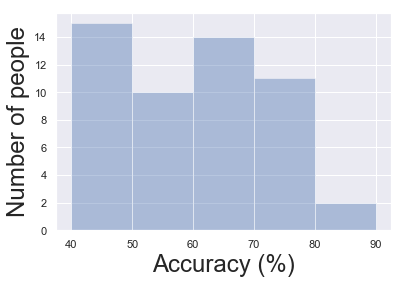

In [3]:
print('The minimum accuracy is {n1}\nThe maximum accuracy is {n2}'.format(n1=min(df['Accuracy']),
                                                                          n2=max(df['Accuracy'])))

f = sns.distplot(df['Accuracy'], bins=[40, 50, 60, 70, 80, 90], kde=False)
plt.xlabel('Accuracy (%)', fontsize=24)
plt.ylabel('Number of people', fontsize=24)
# plt.savefig('Accuracy_distribution.pdf', dpi=400)

The histogram above shows that among the 52 respondents, the accuracy distribution is:
* 40%-50% : 15
* 50%-60% : 10
* 60%-70% : 14
* 70%-80% : 11
* 80%-90% : 2

In [4]:
print('The average accuracy is: {n1}% with a std of ± {n2}%'.format(
    n1=round(df.Accuracy.mean(), 2), n2=round(df.Accuracy.std(), 2)))
print('The median accuracy is: {}%'.format(round(df.Accuracy.median(), 2)))

The average accuracy is: 60.35% with a std of ± 11.9%
The median accuracy is: 61.0%


# Demographic and Statistical Analysis
## Group by academic degree
The academic degree category has 3 features:
* BA/BS: Bachelor of Arts / Bachelor of Science
* MS: Master
* PhD

In [5]:
def IQR(lst):
    return np.percentile(lst, 75) - np.percentile(lst, 25)

In [6]:
df_MS = df[df['Academic_degree'] == 'MS']
df_B = df[df['Academic_degree'] == 'BA/BS']
df_PhD = df[df['Academic_degree'] == 'PhD']

The accuracy distributions for the 3 features above are displayed below. The red dashed line represents the overall average accuracy.

In [7]:
def get_dimension(ax):
    x_bottom, x_top = ax.get_xlim()

    y_bottom, y_top = ax.get_ylim()
    return x_bottom, y_top

In [8]:
sns.reset_defaults()

In [9]:
def group_boxplot(lst_of_features_df, group_name, reset_xticklables, figure_size=(8, 6), font_size=20, top_text="# of\npeople:", top_text_scale_factor=1.015, dashed_line_value=df.Accuracy.mean()):
    # Convert a list of dataframes into a list of accuracies
    lst_of_features = [df.Accuracy for df in lst_of_features_df]

    # Set the plot size
    f, ax = plt.subplots(figsize=figure_size)
    fig = sns.boxplot(data=lst_of_features)

    # Get the x coordinate of the left frame and y coordinate of the top frame
    x_bottom, y_top = get_dimension(ax)
    y_top *= top_text_scale_factor

    # Draw a red dashed line across the plot, representing the overall mean accuracy by individual
    plt.axhline(dashed_line_value, color='r', linestyle='dashed', linewidth=2)
    plt.xlabel(group_name, size=font_size)
    plt.ylabel('Accuracy (%)', size=font_size)
    plt.text(x_bottom, y_top, top_text, size=font_size,
             horizontalalignment="right")

    # Label the number of people in each feature group
    for position in range(len(lst_of_features)):
        ax.text(position, y_top, str(
            len(lst_of_features[position])), size=font_size, horizontalalignment='center')
    ax.tick_params(labelsize=font_size)
    ax.set_xticklabels(reset_xticklables)

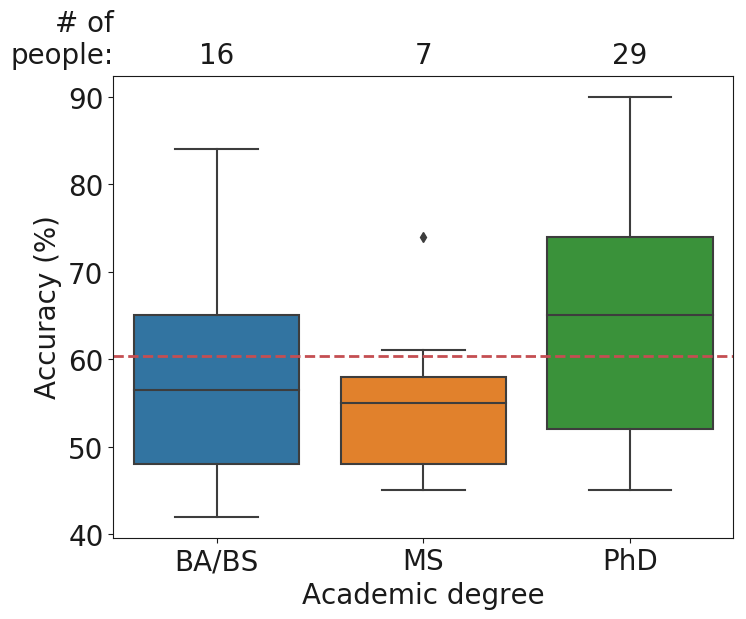

In [10]:
group_boxplot([df_B, df_MS, df_PhD], "Academic degree", ["BA/BS", "MS", "PhD"])

To compute the average accuracy for each feature, 3 separate dataframes are created, eaching containing only one of the three features above.

In [11]:
def print_accuracy_report(lst_of_features_df, names):
    """
    Argument: list of dataframe
    Output: Print a summary of each feature's median accuracy
            along with interquartile range
    """
    for index, df in enumerate(lst_of_features_df):
        accuracies = df.Accuracy
        median_accuracy = accuracies.median()
        IQR_accuracy = IQR(accuracies)
        print("{name}_median_accuracy: {median}%, IQR: {IQR}%, Number_of_{name}: {count}".format(
            name=names[index], median=round(median_accuracy, 2), IQR=round(IQR_accuracy, 2), count=len(accuracies)))

In [12]:
print_accuracy_report([df_B, df_MS, df_PhD], ["BA/BS", "MS", "PhD"])

BA/BS_median_accuracy: 56.5%, IQR: 17.0%, Number_of_BA/BS: 16
MS_median_accuracy: 55.0%, IQR: 10.0%, Number_of_MS: 7
PhD_median_accuracy: 65.0%, IQR: 22.0%, Number_of_PhD: 29


As seen from the results, the PhD category has both the highest accuracy and the largest number of people.

## Group by primary research type
The primary research type category has 3 features:
* Experimental
* Computational
* Theoretical

In [13]:
df_expe = df[df['Experimental'] == 1]
df_comp = df[df['Computational'] == 1]
df_theo = df[df['Theoretical'] == 1]

The accuracy distributions for the 3 features above are displayed below.

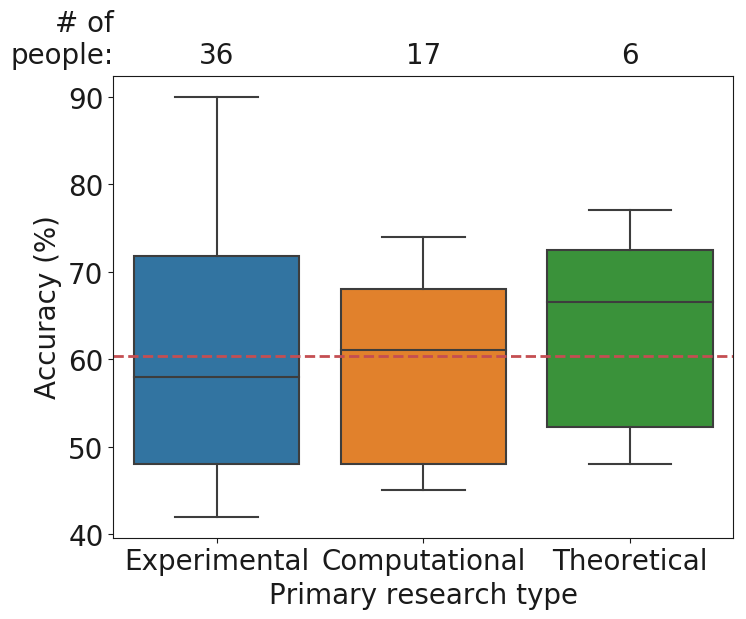

In [14]:
group_boxplot([df_expe, df_comp, df_theo], "Primary research type", [
              "Experimental", "Computational", "Theoretical"])

Using the same procedures as the analysis on academic degree category, the average accuracies the number of people for the 3 features in primaty research type are printed below.

In [15]:
print_accuracy_report([df_expe, df_comp, df_theo], [
                      "Experimental", "Computational", "Theoretical"])

Experimental_median_accuracy: 58.0%, IQR: 23.75%, Number_of_Experimental: 36
Computational_median_accuracy: 61.0%, IQR: 20.0%, Number_of_Computational: 17
Theoretical_median_accuracy: 66.5%, IQR: 20.25%, Number_of_Theoretical: 6


The _theoretical_ feature has the highest accuracy, but it also has the smallest number of people.

## Group by field of study
The field of study has 3 features:
* Mat_sci
* Physics
* Chemistry

In [16]:
df_mat_sci = df[df['Material_Science'] == 1]
df_physics = df[df['Physics'] == 1]
df_chem = df[df['Chemistry'] == 1]

The accuracy distributions for the 3 features above are displayed below.

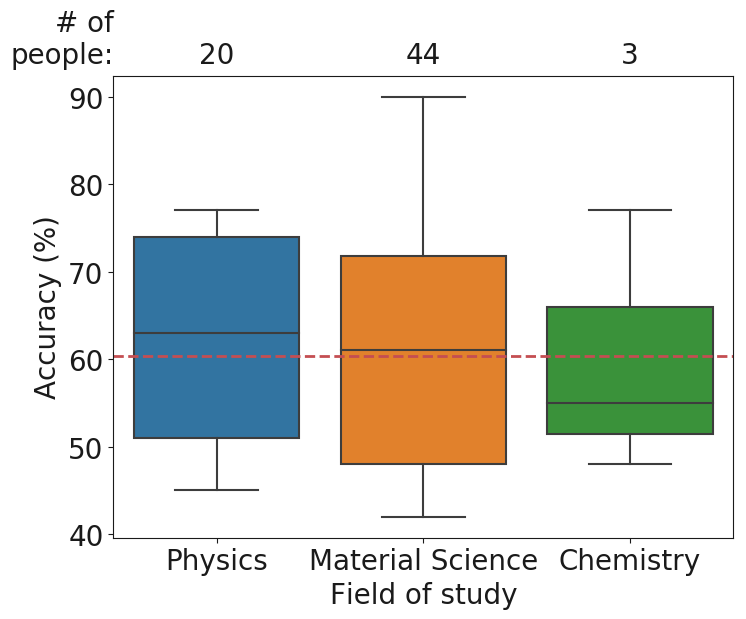

In [17]:
group_boxplot([df_physics, df_mat_sci, df_chem], "Field of study", [
              "Physics", "Material Science", "Chemistry"])

In [18]:
print_accuracy_report([df_physics, df_mat_sci, df_chem], [
    "Physics", "Material Science", "Chemistry"])

Physics_median_accuracy: 63.0%, IQR: 23.0%, Number_of_Physics: 20
Material Science_median_accuracy: 61.0%, IQR: 23.75%, Number_of_Material Science: 44
Chemistry_median_accuracy: 55.0%, IQR: 14.5%, Number_of_Chemistry: 3


## Group by current position
The current position category has 4 features:
* Graduate
* Postdoc
* Faculty
* Staff_scientist

In [19]:
df_grad = df[df['Graduate'] == 1]
df_postdoc = df[df['Postdoc'] == 1]
df_faculty = df[df['Faculty'] == 1]
df_staff_scientist = df[df['Staff_Scientist'] == 1]

The accuracy distributions for the 4 features above are displayed below.

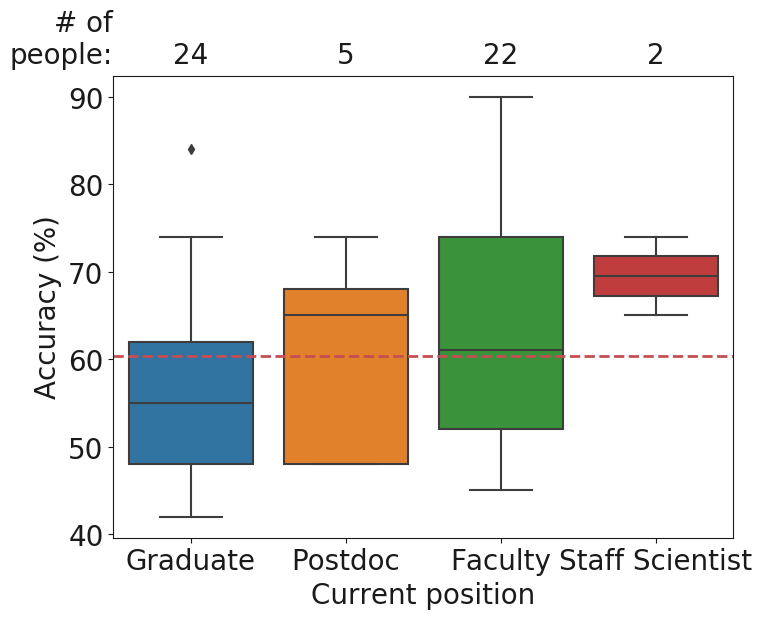

In [20]:
group_boxplot([df_grad, df_postdoc, df_faculty, df_staff_scientist],
              "Current position", ["Graduate", "Postdoc", "Faculty", 'Staff Scientist'])

In [21]:
print_accuracy_report([df_grad, df_postdoc, df_faculty, df_staff_scientist], [
                      "Graduate", "Postdoc", "Faculty", 'Staff Scientist'])

Graduate_median_accuracy: 55.0%, IQR: 14.0%, Number_of_Graduate: 24
Postdoc_median_accuracy: 65.0%, IQR: 20.0%, Number_of_Postdoc: 5
Faculty_median_accuracy: 61.0%, IQR: 22.0%, Number_of_Faculty: 22
Staff Scientist_median_accuracy: 69.5%, IQR: 4.5%, Number_of_Staff Scientist: 2


## Graphical representation of the demographic data
The accuracies of all 12 features are compiled into a list and reshaped.

In [22]:
accuracy_list = [df_MS.Accuracy.median(), df_B.Accuracy.median(), df_PhD.Accuracy.median(),
                 df_expe.Accuracy.median(), df_comp.Accuracy.median(), df_theo.Accuracy.median(),
                 df_mat_sci.Accuracy.median(), df_physics.Accuracy.median(), df_chem.Accuracy.median(),
                 df_grad.Accuracy.median(), df_postdoc.Accuracy.median(), df_faculty.Accuracy.median(), 
                 df_staff_scientist.Accuracy.median()]
accuracy_list_np = np.reshape(accuracy_list, (1, -1))[0]

The corresponding names of these features are also complile into a list.

In [23]:
accuracy_name = ['MS', 'BA/BS', 'PhD', 
                 'Experimental', 'Computational', 'Theoretical',
                 'Mat_sci', 'Physics', 'Chemistry', 
                 'Graduate', 'Postdoc', 'Faculty', 'Staff_Scientist']
accuracy_name_np = np.array(accuracy_name)

In [24]:
print(accuracy_list_np)

[55.  56.5 65.  58.  61.  66.5 61.  63.  55.  55.  65.  61.  69.5]


Because the list containing all the accuracies are not yet ranked from the highest to the lowest, a sort function is used to get the indices of the accuracies values ranking from the highest to the lowest.

In [25]:
indices = np.argsort(accuracy_list)[::-1]

Reorganize the name list and the values list using the ranked indices.

In [26]:
X = accuracy_name_np[indices]
Y = accuracy_list_np[indices]
print(X)

['Staff_Scientist' 'Theoretical' 'Postdoc' 'PhD' 'Physics' 'Faculty'
 'Mat_sci' 'Computational' 'Experimental' 'BA/BS' 'Graduate' 'Chemistry'
 'MS']


The lists are then divided into 4 sub-lists, corresponding to the 4 categories mentioned in the previous section.

In [27]:
X_position = X[[0, 2, 5, 10]]
X_research_type = X[[1, 7, 8]]
X_degree = X[[3, 9, 12]]
X_field = X[[4, 6, 11]]

In [28]:
Y_position = Y[[0, 2, 5, 10]]
Y_research_type = Y[[1, 7, 8]]
Y_degree = Y[[3, 9, 12]]
Y_field = Y[[4, 6, 11]]

In [29]:
def give_length(lst_of_lst):
    return [len(lst) for lst in lst_of_lst]

In [30]:
print(give_length([Y_position, Y_research_type, Y_degree, Y_field]))

[4, 3, 3, 3]


In [31]:
def group_barplot(y_lst, x_labels, title, y_lim=[50, 70], y_title="Median Accuracy (%)",
                  font_size=15, fig_size=(8, 6), legends=[]):
    
    y = np.concatenate(y_lst)
    x = list(range(len(y)))

    f, ax = plt.subplots(figsize=fig_size)
    
    lengths = give_length(y_lst)
    index = 0
    for length in lengths:
        plt.bar(x[index:index+length], y[index:index+length])
        index += length

    plt.xticks(x, x_labels)
    for label in ax.get_xticklabels():
        label.set_ha("left")
        label.set_rotation(-45)

    ax.tick_params(labelsize=font_size)
    plt.ylabel(y_title, fontsize=font_size)
    plt.ylim(y_lim)
    plt.title(title)
    # Print out the given legends
    if legends:
        plt.legend(legends)
    plt.tight_layout()

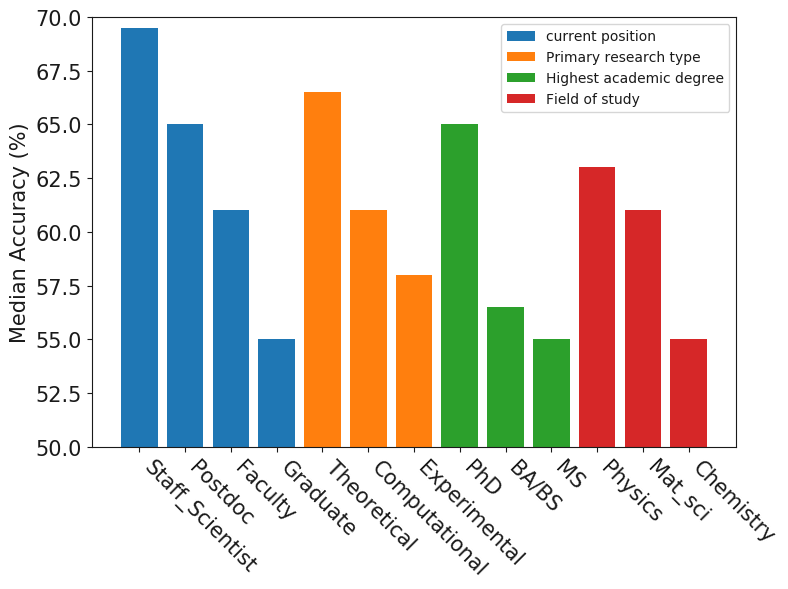

In [32]:
group_barplot([Y_position, Y_research_type, Y_degree, Y_field],
              np.concatenate([X_position, X_research_type, X_degree, X_field]),
              title="",
              legends=["current position",
                       "Primary research type",
                       "Highest academic degree",
                       "Field of study"])

The bar graph without dividing the name and accuracy lists into sub-lists.

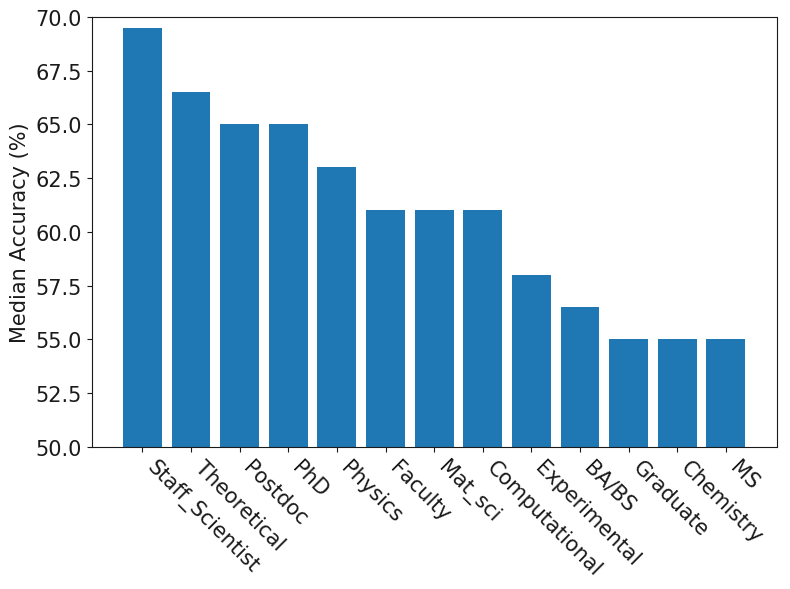

In [33]:
group_barplot([Y], X, title="")

# Compound Classification
The survey also yields results on how well human researches classify the conductivity class of an unknown compounds and on what descriptors they use most or least often.
## Load the compound classification dataset

In [34]:
cc = pd.read_csv("~/Downloads/Compound_Classification_Complete.csv")

print(cc.head())
print()
print(cc.info())

  Formula  Metal  Insulator  MIT  Accuracy  Label  Stoichiometry  \
0  LaRuO3     31         21   37  0.596154      1             27   
1  LaFeO3     14         38   27  0.730769      0             26   
2  LaNiO3     35         17   36  0.673077      1             27   
3  CaFeO3     16         36   28  0.538462      2             25   
4    ReO3     31         21   16  0.596154      1             23   

   Crystal_structure  Average_MO_distance  Valence_electron  d_electron  \
0                 37                   26                26          40   
1                 36                   17                29          39   
2                 35                   24                30          40   
3                 31                   16                25          39   
4                 33                   13                24          36   

   Mass_density  Mean_electronegativity  Polarizability  Std_of_ionic_radius  \
0             1                       8               8     

There are 18 compounds in total, 6 of which are metals, 6 of which are insulators, and the rest exhibit metal-to-insulator transition (MIT).
## Divide the dataframe into 3 conductivity class subsets.

In [35]:
cc_metal = cc[cc['Label'] == 1]
cc_insulator = cc[cc['Label'] == 0]
cc_mit = cc[cc['Label'] == 2]

The accuracy distributions for each conductivity class are displayed below.

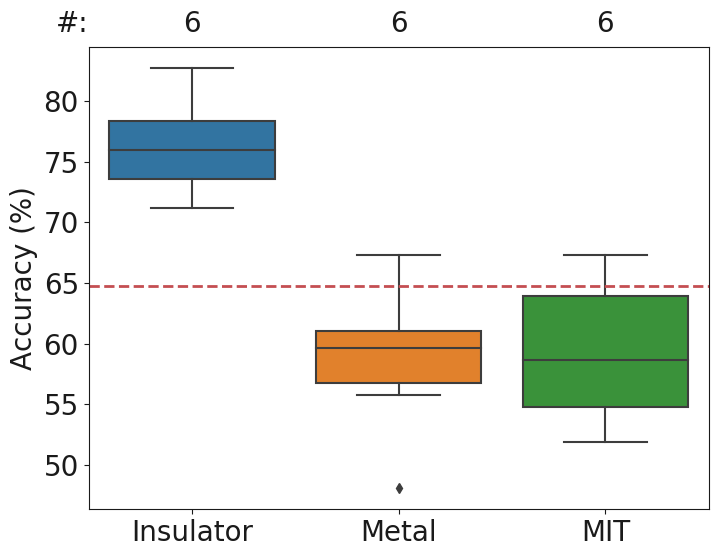

In [36]:
group_boxplot([cc_insulator*100, cc_metal*100, cc_mit*100],
              "", ["Insulator", "Metal", "MIT"], top_text="#:", dashed_line_value=cc.Accuracy.mean()*100)

Compute the average accuracy for each subset.

In [37]:
print('Overall median accuracy by compound: {n1}% ± {n2}%'.format(
    n1=round(cc.Accuracy.median()*100, 2), n2=round(IQR(cc.Accuracy)*100, 2)))
for name, accuracy_per_class in zip(["Insulator", "Metal", "MIT"], [cc_insulator.Accuracy, cc_metal.Accuracy, cc_mit.Accuracy]):
    print("{class_name}_median_accuracy: {accuracy}% ± {IQR}%".format(class_name=name, accuracy=round(
        accuracy_per_class.median()*100, 2), IQR=round(IQR(accuracy_per_class)*100, 2)))

Overall median accuracy by compound: 63.46% ± 14.42%
Insulator_median_accuracy: 75.96% ± 4.81%
Metal_median_accuracy: 59.62% ± 4.33%
MIT_median_accuracy: 58.65% ± 9.13%


The insulator class has the best classification accuracy, while the metal has the lowest.

## Descriptor usage analysis
Irrelevant columns are dropped. The remaining subset dataframes each contain 11 descriptor columns. The number in each column represents the number of times this descriptor are selected as an important feature in determining the conductivity class of the corresponding compound. The numbers of appearance as important feature are then summed for each conductivity class.

In [38]:
metal_series = cc_metal.drop(['Formula', 'Accuracy', 'Metal',
                              'Insulator', 'MIT', 'Label'], axis=1).sum(axis=0).sort_values(ascending=False)

insulator_series = cc_insulator.drop(['Formula', 'Accuracy', 'Metal',
                                      'Insulator', 'MIT', 'Label'], axis=1).sum(axis=0).sort_values(ascending=False)

mit_series = cc_mit.drop(['Formula', 'Accuracy', 'Metal',
                          'Insulator', 'MIT', 'Label'], axis=1).sum(axis=0).sort_values(ascending=False)

In [39]:
print('Metals:\n{}\n'.format(metal_series))
print('Insulators:\n{}\n'.format(insulator_series))
print('MITs:\n{}\n'.format(mit_series))

Metals:
d_electron                 222
Crystal_structure          203
Stoichiometry              161
Electronic_corr            155
Valence_electron           152
Crystal_field_splitting    149
Average_MO_distance        104
Polarizability              57
Mean_electronegativity      51
Std_of_ionic_radius         29
Mass_density                 9
dtype: int64

Insulators:
d_electron                 217
Crystal_structure          167
Stoichiometry              156
Valence_electron           140
Crystal_field_splitting    126
Electronic_corr            119
Average_MO_distance         79
Polarizability              59
Mean_electronegativity      48
Std_of_ionic_radius         19
Mass_density                14
dtype: int64

MITs:
d_electron                 214
Crystal_structure          174
Stoichiometry              151
Crystal_field_splitting    148
Electronic_corr            139
Valence_electron           139
Average_MO_distance         91
Polarizability              60
Mean_electronega

For each descriptor in one conductivity class, the maximum number for it to selected for one compound is 52, since there are 52 respondents in this dataframe. In each conductivity class, there are 6 compounds, so the maximum number possible for a descriptor to be selected is $52 * 6 =  306$

In [40]:
total_appearance = tn*6

The number of appeareances for the 11 descriptors in each class are reorganized into lists, along with the corresponding labels.

In [41]:
metal_index = metal_series.index.tolist()
metal_index_relabeled = [x+'_1' for x in metal_index]
metal_values = metal_series.values
metal_values_recalculated = [x/total_appearance*100 for x in metal_values]

insulator_index = insulator_series.index.tolist()
insulator_index_relabeled = [x+'_0' for x in insulator_index]
insulator_values = insulator_series.values
insulator_values_recalculated = [
    x/total_appearance*100 for x in insulator_series]

MIT_index = mit_series.index.tolist()
MIT_index_relabeled = [x+'_2' for x in MIT_index]
MIT_values = mit_series.values
MIT_values_recalculated = [x/total_appearance*100 for x in MIT_values]

### 3 most-often used descriptors

3 most-often used descriptors for each conductivity class are sliced from the original lists.

In [42]:
n_descriptors = 3

X_metal_most = metal_index_relabeled[:n_descriptors]
Y_metal_most = metal_values_recalculated[:n_descriptors]

X_insulator_most = insulator_index_relabeled[:n_descriptors]
Y_insulator_most = insulator_values_recalculated[:n_descriptors]

X_mit_most = MIT_index_relabeled[:n_descriptors]
Y_mit_most = MIT_values_recalculated[:n_descriptors]

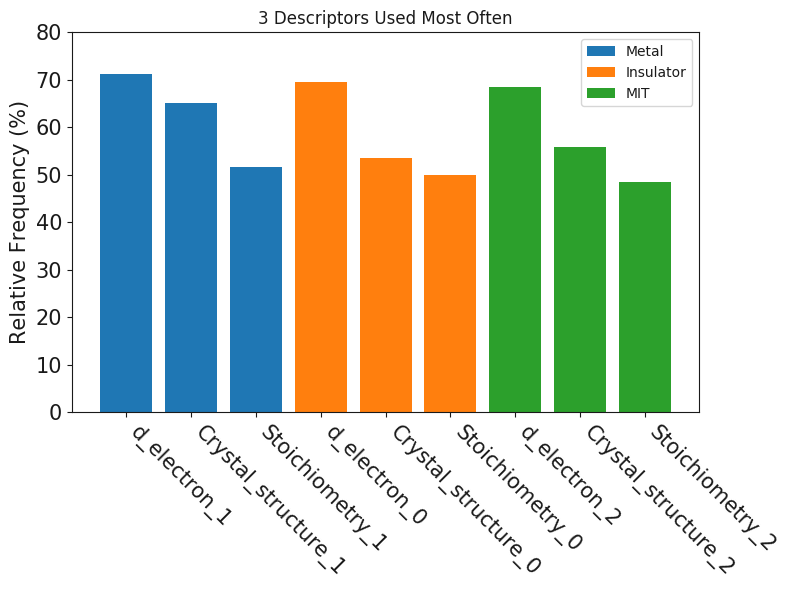

In [43]:
group_barplot([Y_metal_most, Y_insulator_most, Y_mit_most],
              np.concatenate([X_metal_most, X_insulator_most, X_mit_most]),
              title="3 Descriptors Used Most Often",
              y_title = "Relative Frequency (%)",
              y_lim = [0,80],
              legends=["Metal",
                       "Insulator",
                       "MIT"])

### 3 least-often used descriptors

3 least-often used descriptors for each conductivity class are sliced from the original lists.

In [44]:
X_metal_least = metal_index_relabeled[-n_descriptors:]
Y_metal_least = metal_values_recalculated[-n_descriptors:]

X_insulator_least = insulator_index_relabeled[-n_descriptors:]
Y_insulator_least = insulator_values_recalculated[-n_descriptors:]

X_mit_least = MIT_index_relabeled[-n_descriptors:]
Y_mit_least = MIT_values_recalculated[-n_descriptors:]

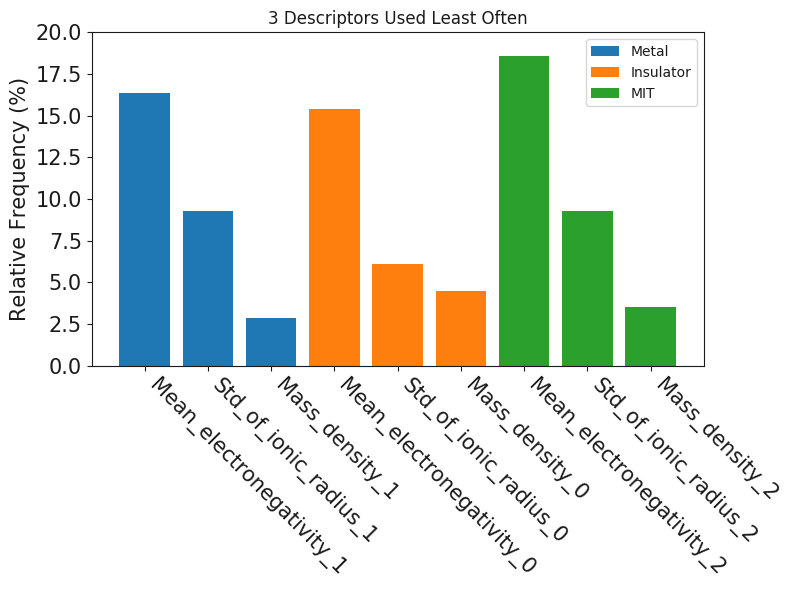

In [45]:
group_barplot([Y_metal_least, Y_insulator_least, Y_mit_least],
              np.concatenate([X_metal_least, X_insulator_least, X_mit_least]),
              title="3 Descriptors Used Least Often",
              y_title = "Relative Frequency (%)",
              y_lim = [0,20],
              legends=["Metal",
                       "Insulator",
                       "MIT"])

### Descriptor usage by compound
The compound classification dataframe is sorted using the values in the 'Accuracy' columns in descending order

In [46]:
cc_sorted = cc.sort_values(by='Accuracy', axis=0, ascending=False)
print(cc_sorted.head(5))

    Formula  Metal  Insulator  MIT  Accuracy  Label  Stoichiometry  \
14    Cr2O3      9         43   19  0.826923      0             23   
12  Sr2TiO4     11         41   21  0.788462      0             28   
6      MoO3     12         40   16  0.769231      0             27   
15     KVO3     13         39   19  0.750000      0             26   
1    LaFeO3     14         38   27  0.730769      0             26   

    Crystal_structure  Average_MO_distance  Valence_electron  d_electron  \
14                 29                   16                20          37   
12                 24                    8                23          35   
6                  26                   15                30          36   
15                 27                    9                20          36   
1                  36                   17                29          39   

    Mass_density  Mean_electronegativity  Polarizability  Std_of_ionic_radius  \
14             1                       8 

#### Descriptors usage for the 5 compounds with highest accuracy

In [47]:
n_compound = 5

cc_sorted_5_most = cc_sorted.iloc[:n_compound, :]
cc_sorted_5_most_series = cc_sorted_5_most.drop(['Formula', 'Accuracy', 'Metal',
                                                 'Insulator', 'MIT', 'Label'], axis=1).sum(axis=0).sort_values(ascending=False)
print('{n_1} Most Accurate:\n{n_2}\n'.format(
    n_1=n_compound, n_2=cc_sorted_5_most_series))

5 Most Accurate:
d_electron                 183
Crystal_structure          142
Stoichiometry              130
Valence_electron           122
Crystal_field_splitting    106
Electronic_corr             96
Average_MO_distance         65
Polarizability              50
Mean_electronegativity      38
Std_of_ionic_radius         16
Mass_density                13
dtype: int64



To convert the values in the series into percentage, the maximum number for each descriptor to be chosen is calculated as $52 \times 5 = 260$.

In [48]:
total_appearance_2 = tn*5

In [49]:
cc_sorted_5_most_series_index = cc_sorted_5_most_series.index.tolist()
cc_sorted_5_most_series_values = cc_sorted_5_most_series.values
cc_sorted_5_most_series_values_recalculated = [
    x/total_appearance_2*100 for x in cc_sorted_5_most_series_values]

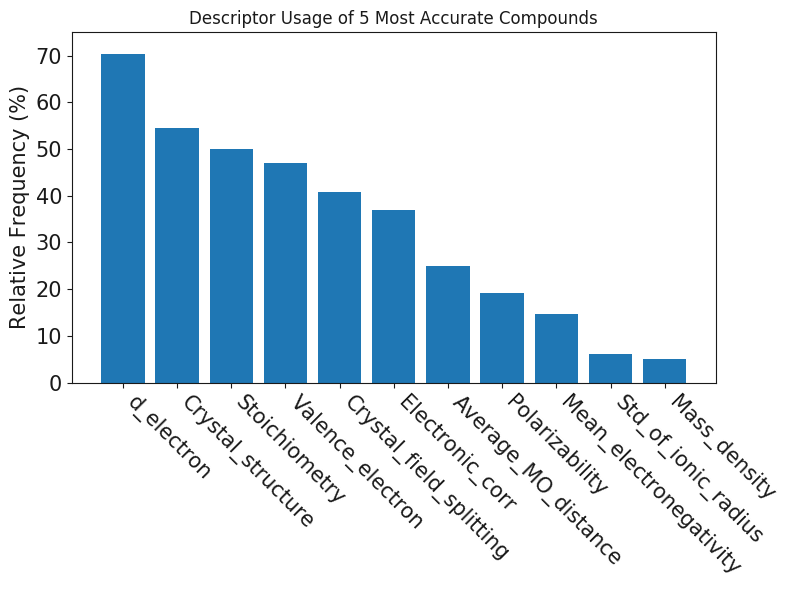

In [50]:
group_barplot([cc_sorted_5_most_series_values_recalculated], 
              cc_sorted_5_most_series_index, 
              y_lim = [0,75],
              y_title= "Relative Frequency (%)",
              title="Descriptor Usage of 5 Most Accurate Compounds")

#### Descriptors usage for the 5 compounds with lowest accuracy

In [51]:
cc_sorted_5_least = cc_sorted.iloc[-n_compound:, :]
cc_sorted_5_least_series = cc_sorted_5_least.drop(['Formula', 'Accuracy', 'Metal',
                                                   'Insulator', 'MIT', 'Label'], axis=1).sum(axis=0).sort_values(ascending=False)
print('{n_1} Least Accurate:\n{n_2}\n'.format(
    n_1=n_compound, n_2=cc_sorted_5_least_series))

5 Least Accurate:
d_electron                 177
Crystal_structure          149
Stoichiometry              134
Valence_electron           117
Electronic_corr            116
Crystal_field_splitting    114
Average_MO_distance         80
Polarizability              51
Mean_electronegativity      41
Std_of_ionic_radius         29
Mass_density                 9
dtype: int64



In [52]:
cc_sorted_5_least_series_index = cc_sorted_5_least_series.index.tolist()
cc_sorted_5_least_series_values = cc_sorted_5_least_series.values
cc_sorted_5_least_series_values_recalculated = [
    x/total_appearance_2*100 for x in cc_sorted_5_least_series_values]

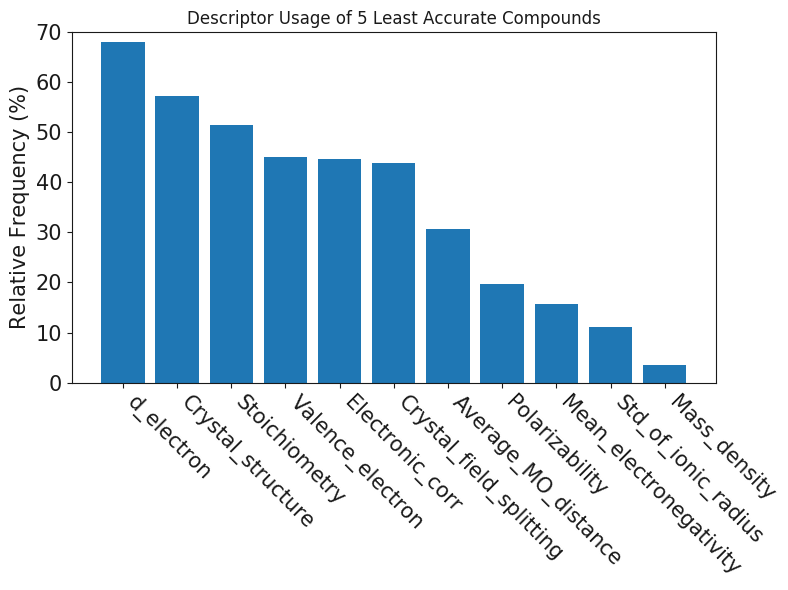

In [53]:
group_barplot([cc_sorted_5_least_series_values_recalculated], 
              cc_sorted_5_least_series_index, 
              y_lim = [0,70],
              y_title= "Relative Frequency (%)",
              title="Descriptor Usage of 5 Least Accurate Compounds")

### Descriptor usage by individual
#### Load the individual response dataset

In [54]:
ir = pd.read_csv("~/Downloads/Individual_responses.csv")
print(ir.head())

  Formula  Metal  Insulator  MIT  Correct  Label  Stoichiometry  \
0  LaRuO3      1          0    1      1.0      1              0   
1  LaFeO3      0          1    0      1.0      0              1   
2  LaNiO3      1          0    0      1.0      1              1   
3  CaFeO3      1          0    1      1.0      2              1   
4    ReO3      1          0    0      1.0      1              0   

   Crystal_structure  Average_MO_distance  Valence_electron  d_electron  \
0                  0                    1                 0           1   
1                  1                    0                 0           1   
2                  1                    1                 0           0   
3                  0                    0                 0           1   
4                  1                    0                 0           1   

   Mass_density  Mean_electronegativity  Polarizability  Std_of_ionic_radius  \
0             0                       0               0           

#### Descriptors usage for the 5 people with highest accuracy

In [55]:
ir_sorted = ir.sort_values(ascending=False, by=['Accuracy'])
ir_sorted_top_5 = ir_sorted.iloc[:18*5]

In [56]:
columns_dropped = ['Formula', 'Accuracy', 'Metal',
                   'Insulator', 'MIT', 'Label',
                   'Correct', 'Respondent']

In [57]:
top_5_correct = ir_sorted_top_5[ir_sorted_top_5['Correct'] == 1].drop(
    columns_dropped, axis=1).sum(axis=0).sort_values(ascending=False)

In [58]:
top_5_wrong = ir_sorted_top_5[ir_sorted_top_5['Correct'] == 0].drop(
    columns_dropped, axis=1).sum(axis=0).sort_values(ascending=False)

In [59]:
print('Top 5 Correct: \n{}\n'.format(top_5_correct))
print('Top 5 Wrong: \n{}\n'.format(top_5_wrong))

Top 5 Correct: 
d_electron                 72
Crystal_structure          50
Crystal_field_splitting    43
Valence_electron           43
Stoichiometry              35
Electronic_corr            31
Average_MO_distance        17
Std_of_ionic_radius         7
Mean_electronegativity      7
Mass_density                5
Polarizability              4
dtype: int64

Top 5 Wrong: 
d_electron                 7
Valence_electron           7
Crystal_field_splitting    6
Crystal_structure          6
Stoichiometry              6
Std_of_ionic_radius        4
Electronic_corr            3
Average_MO_distance        2
Polarizability             1
Mean_electronegativity     1
Mass_density               0
dtype: int64



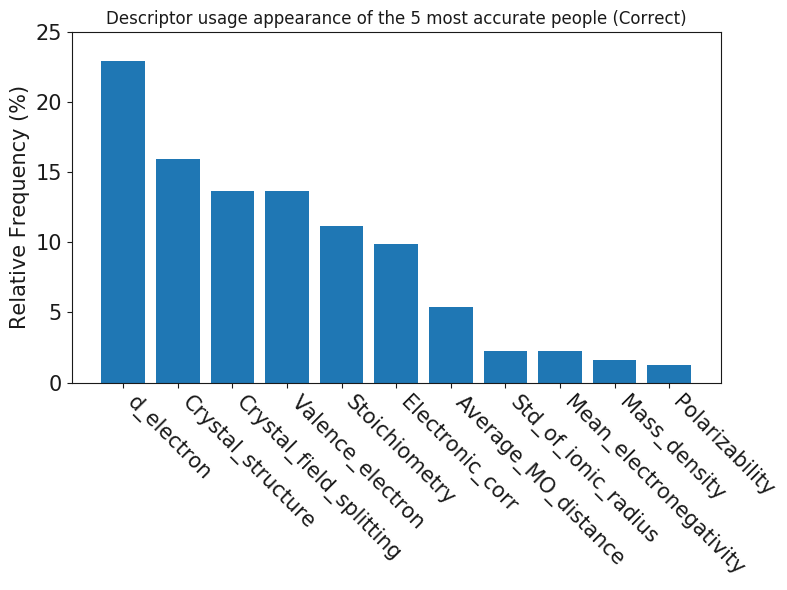

In [60]:
group_barplot([[x/sum(top_5_correct.values)*100 for x in top_5_correct.values]], 
              top_5_correct.index.tolist(), 
              y_lim = [0,25],
              y_title= "Relative Frequency (%)",
              title="Descriptor usage appearance of the 5 most accurate people (Correct)")

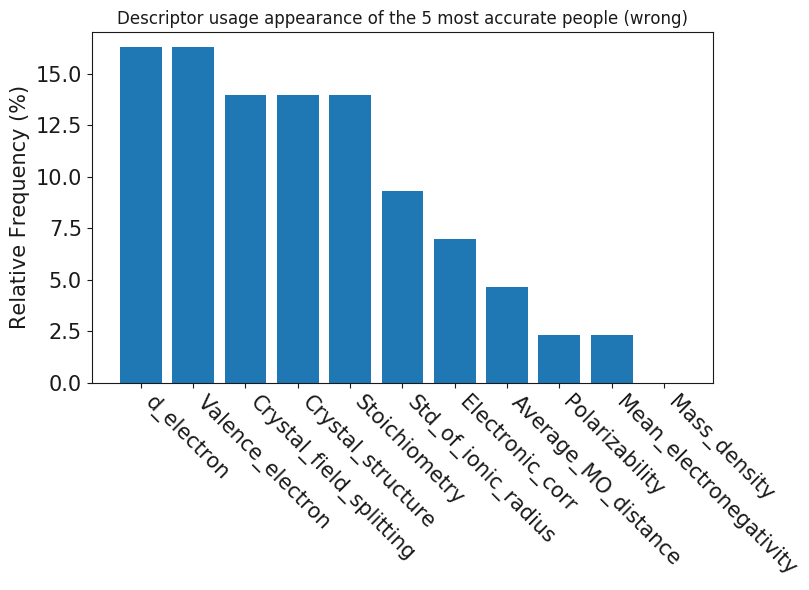

In [61]:
group_barplot([[x/sum(top_5_wrong.values)*100 for x in top_5_wrong.values]], 
              top_5_wrong.index.tolist(), 
              y_lim = [0,17],
              y_title= "Relative Frequency (%)",
              title="Descriptor usage appearance of the 5 most accurate people (wrong)")

#### Descriptors usage for the 5 people with lowest accuracy

In [62]:
ir_sorted_bot_5 = ir_sorted.iloc[-18*5:]
bot_5_correct = ir_sorted_bot_5[ir_sorted_bot_5['Correct'] == 1].drop(
    columns_dropped, axis=1).sum(axis=0).sort_values(ascending=False)
bot_5_wrong = ir_sorted_bot_5[ir_sorted_bot_5['Correct'] == 0].drop(
    columns_dropped, axis=1).sum(axis=0).sort_values(ascending=False)


print('Bottom 5 Correct: \n{}\n'.format(bot_5_correct))
print('Bottom 5 Wrong: \n{}\n'.format(bot_5_wrong))

Bottom 5 Correct: 
d_electron                 35
Crystal_structure          33
Polarizability             29
Stoichiometry              29
Electronic_corr            27
Crystal_field_splitting    25
Mean_electronegativity     21
Valence_electron           21
Average_MO_distance         9
Std_of_ionic_radius         2
Mass_density                1
dtype: int64

Bottom 5 Wrong: 
Crystal_structure          36
d_electron                 33
Electronic_corr            28
Polarizability             25
Stoichiometry              24
Crystal_field_splitting    23
Valence_electron           22
Mean_electronegativity     19
Average_MO_distance         5
Std_of_ionic_radius         4
Mass_density                0
dtype: int64



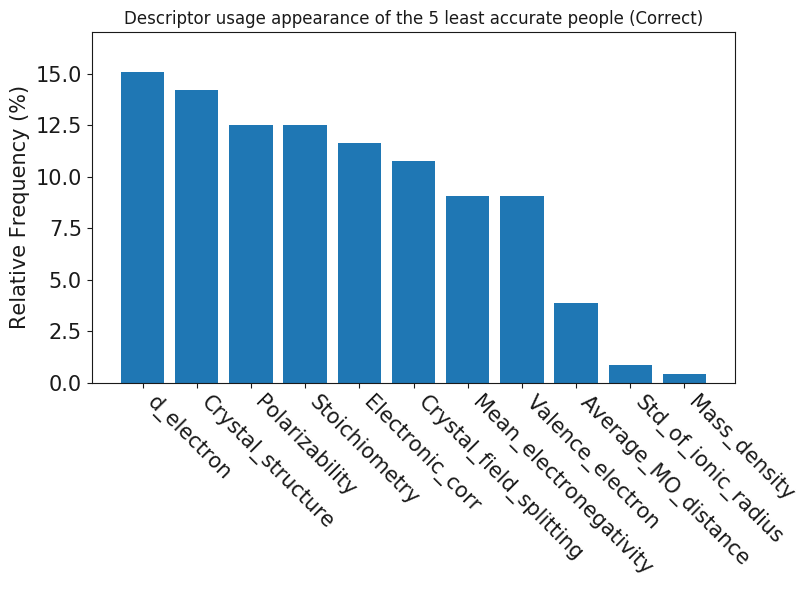

In [63]:
group_barplot([[x/sum(bot_5_correct.values)*100 for x in bot_5_correct.values]], 
              bot_5_correct.index.tolist(), 
              y_lim = [0,17],
              y_title= "Relative Frequency (%)",
              title="Descriptor usage appearance of the 5 least accurate people (Correct)")

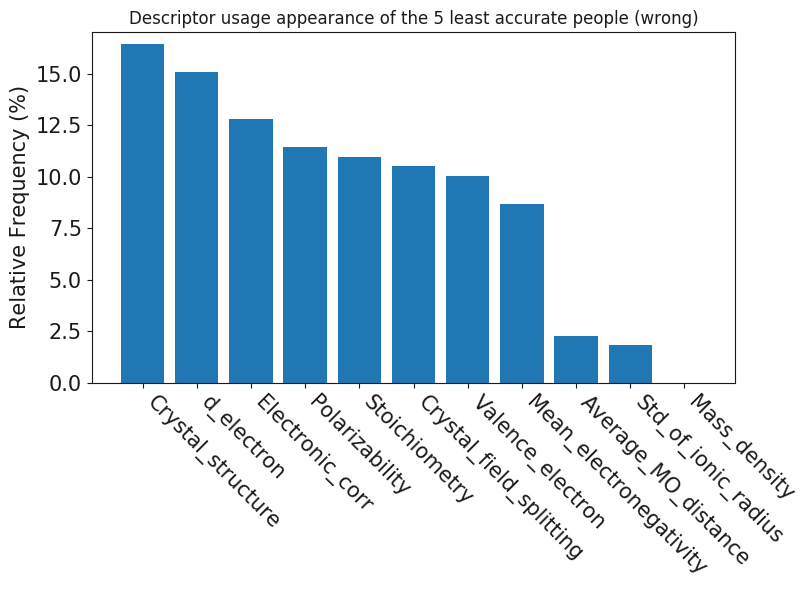

In [64]:
group_barplot([[x/sum(bot_5_wrong.values)*100 for x in bot_5_wrong.values]], 
              bot_5_wrong.index.tolist(), 
              y_lim = [0,17],
              y_title= "Relative Frequency (%)",
              title="Descriptor usage appearance of the 5 least accurate people (wrong)")

## Compounds ranked by prediction accuracy

Obtain the accuracy values and the corresponding chemical formulas

In [65]:
X_cc_sorted = cc_sorted.Formula.values
Y_cc_sorted = cc_sorted.Accuracy.values
Y_cc_sorted_recalculated = [x*100 for x in Y_cc_sorted]

print(X_cc_sorted)
print(Y_cc_sorted_recalculated)

X_cc_sorted_relabeled = ['Cr2O3_i', 'Sr2TiO4_i', 'MoO3_i', 'KVO3_i', 'LaFeO3_i', 'MnO_i',
                         'LaNiO3_m', 'Ca2RuO4_mit', 'BaVS3_mit', 'MoO2_m', 'Ti2O3_mit', 'LaRuO3_m',
                         'Ag2BiO3_mit', 'ReO3_m', 'NbO2_mit', 'TiO_m', 'CaFeO3_mit', 'SrCrO3_m']

['Cr2O3' 'Sr2TiO4' 'MoO3' 'KVO3' 'LaFeO3' 'MnO' 'LaNiO3' 'Ca2RuO4' 'BaVS3'
 'MoO2' 'Ti2O3' 'LaRuO3' 'ReO3' 'Ag2BiO3' 'TiO' 'CaFeO3' 'NbO2' 'SrCrO3']
[82.6923077, 78.8461538, 76.92307690000001, 75.0, 73.07692309999999, 71.1538462, 67.3076923, 67.3076923, 65.3846154, 61.5384615, 59.6153846, 59.6153846, 59.6153846, 57.6923077, 55.7692308, 53.846153799999996, 51.9230769, 48.0769231]


Plot a bar graph with the x-axis being the chemical formula and y-axis being the prediction accuracy

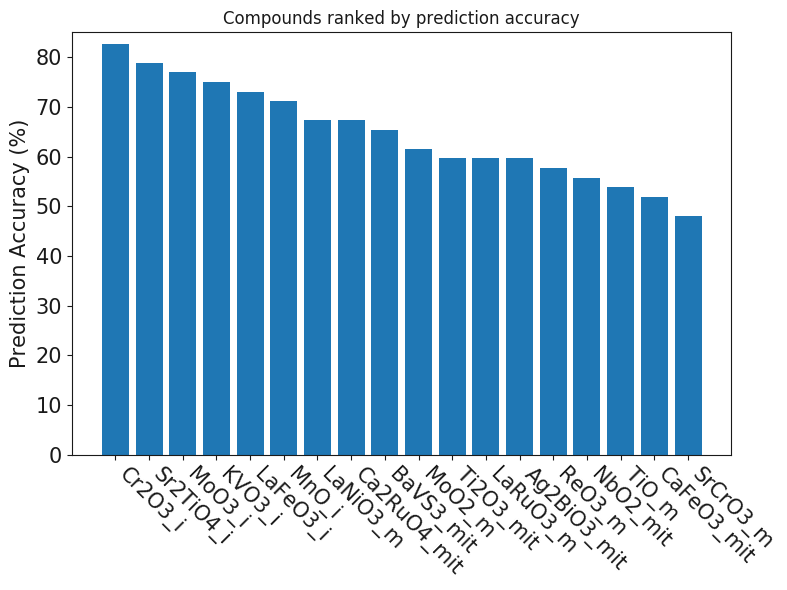

In [66]:
group_barplot([Y_cc_sorted_recalculated], 
              X_cc_sorted_relabeled, 
              y_lim = [0,85],
              y_title= "Prediction Accuracy (%)",
              title="Compounds ranked by prediction accuracy")

Compound ranking plot with color coding

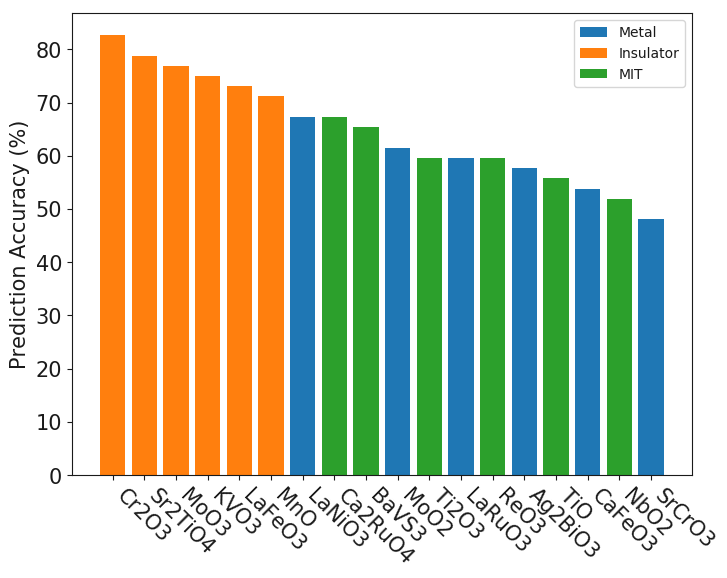

In [67]:
f, ax = plt.subplots(figsize=(8,6))
ax.bar([6,9,11,13,15,17], np.array(Y_cc_sorted_recalculated)[[6,9,11,13,15,17]])
ax.bar([0,1,2,3,4,5], np.array(Y_cc_sorted_recalculated)[[0,1,2,3,4,5]])
ax.bar([7,8,10,12,14,16], np.array(Y_cc_sorted_recalculated)[[7,8,10,12,14,16]])
plt.ylabel("Prediction Accuracy (%)", fontsize=15)
plt.xticks(range(18), X_cc_sorted)
for label in ax.get_xticklabels():
    label.set_ha("left")
    label.set_rotation(-45)
ax.tick_params(labelsize=15)
plt.legend(["Metal", "Insulator", "MIT"])

## Per class accuracy distribution

In [68]:
def class_accuracy_distribution(target_name):
    if target_name == 'MIT':
        target_number = 2
    elif target_name == 'Insulator':
        target_number = 0
    else:
        target_number = 1

    accuracies_list = []
    for i in np.arange(1, tn+1):
        df = ir[ir['Respondent'] == i]
        ir_class = df[df['Label'] == target_number]
        accuracy = ir_class[ir_class[target_name]
                            == 1].shape[0] / ir_class.shape[0] * 100
        accuracies_list.append(round(accuracy, 2))

    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(accuracies_list, bins=[
                       0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], kde=False)
    plt.xlabel('Accuracy by compound(%)', fontsize=24)
    plt.ylabel('Number of people', fontsize=24)
    plt.title(target_name + " accuracy distribution", fontsize=32)

### MIT accuracy

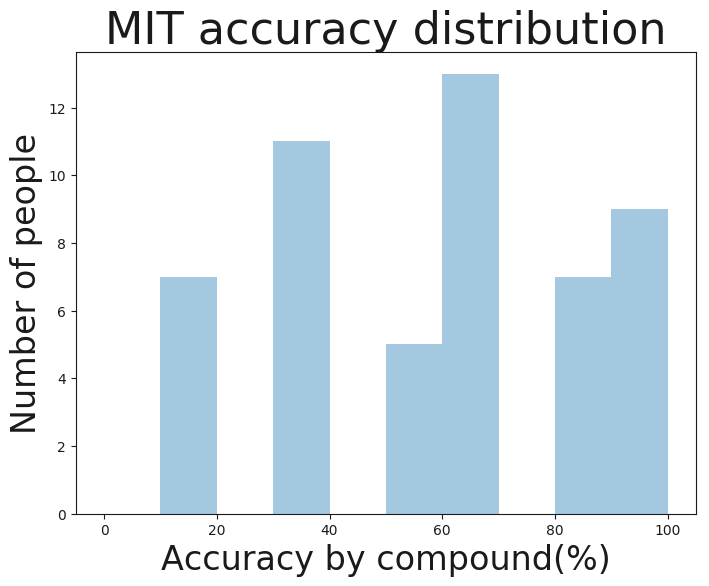

In [69]:
class_accuracy_distribution('MIT')

### Insulator accuracy

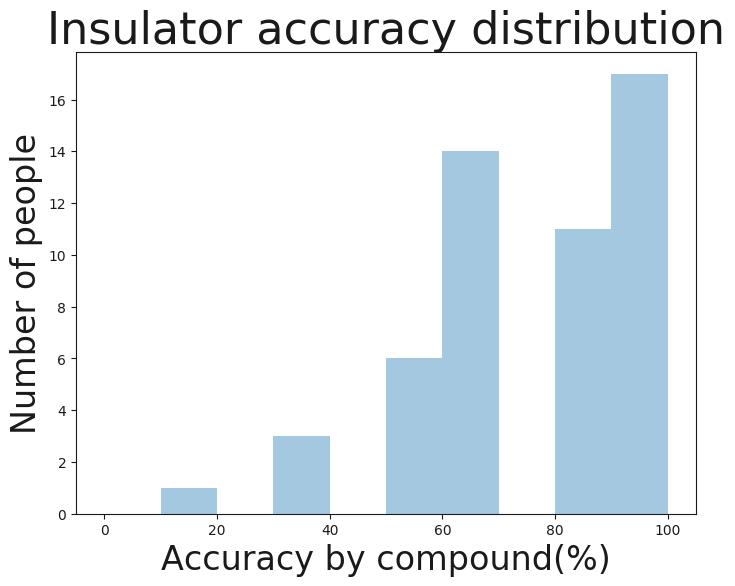

In [70]:
class_accuracy_distribution('Insulator')

### Metal accuracy

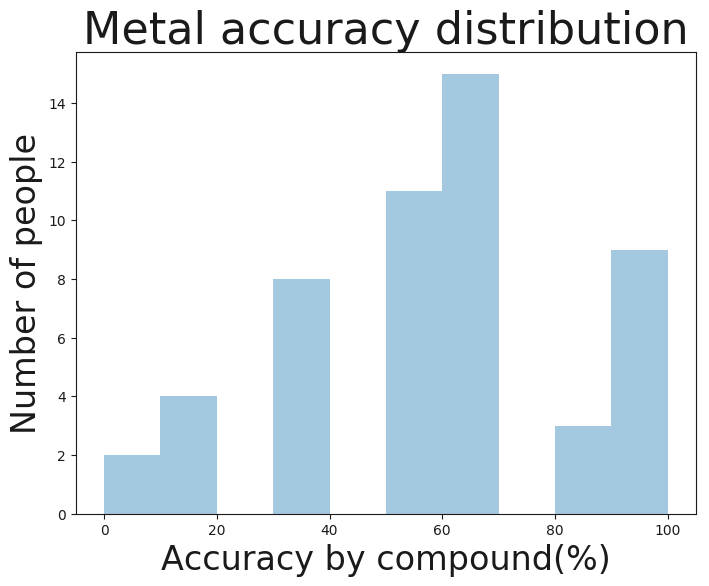

In [71]:
class_accuracy_distribution('Metal')

# Comparison with Machine Learning Algorithm

In [72]:
def print_table(table):
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 3)
        for i in range(len(table[0]))
    ]
    row_format = "".join(
        ["{:>" + str(longest_col) + "}" for longest_col in longest_cols])
    for row in table:
        print(row_format.format(*row))

In [73]:
def give_stat_metrics(target_number, target_name, df=ir):
    tp = df[(df['Label'] == target_number) & (df[target_name] == 1)]
    tn = df[(df['Label'] != target_number) & (df[target_name] != 1)]
    fp = df[(df['Label'] != target_number) & (df[target_name] == 1)]
    fn = df[(df['Label'] == target_number) & (df[target_name] != 1)]

    n_tp = tp.shape[0]
    n_tn = tn.shape[0]
    n_fp = fp.shape[0]
    n_fn = fn.shape[0]

    return n_tp, n_tn, n_fp, n_fn

In [74]:
def give_confusion_metrics(n_tp, n_tn, n_fp, n_fn):
    
    if (n_tp + n_fp != 0) & (n_tn + n_fn != 0):
        p0 = round(n_tp / (n_tp + n_fp), 2)
        r0 = round(n_tp / (n_tp + n_fn), 2)
        f0 = round(2 * n_tp / (2 * n_tp + n_fp + n_fn), 2)
        s0 = n_tp + n_fn
        
        p1 = round(n_tn / (n_tn + n_fn), 2)
        r1 = round(n_tn / (n_tn + n_fp), 2)
        f1 = round(2 * n_tn / (2 * n_tn + n_fn + n_fp), 2)
        s1 = n_tn + n_fp
    elif n_tp + n_fp == 0:
        p0 = 0
        r0 = 0
        f0 = 0
        s0 = n_tp + n_fn
        
        p1 = round(n_tn / (n_tn + n_fn), 2)
        r1 = 1
        f1 = round(2 * n_tn / (2 * n_tn + n_fn + n_fp), 2)
        s1 = n_tn + n_fp
    elif n_tn + n_fn == 0:
        p0 = round(n_tp / (n_tp + n_fp), 2)
        r0 = 1
        f0 = round(2 * n_tp / (2 * n_tp + n_fp + n_fn), 2)
        s0 = n_tp + n_fn
        
        p1 = 0
        r1 = 0
        f1 = 0
        s1 = n_tn + n_fp

    w0 = s0 / (s0+s1)
    w1 = s1 / (s0+s1)

    a1 = round(p0*w0 + p1*w1, 2)
    a2 = round(r0*w0 + r1*w1, 2)
    a3 = round(f0*w0 + f1*w1, 2)
    a4 = s0 + s1
    
    return {"target":    [p0, r0, f0, s0],
           "non-target": [p1, r1, f1, s1],
           "avg_total":  [a1, a2, a3, a4]}

In [75]:
def print_report(target_name, df=ir):
    if target_name == 'MIT':
        target_number = 2

    elif target_name == 'Insulator':
        target_number = 0

    elif target_name == 'Metal':
        target_number = 1

    n_tp, n_tn, n_fp, n_fn = give_stat_metrics(target_number, target_name, df=df)

    confusion_metrics = give_confusion_metrics(n_tp, n_tn, n_fp, n_fn)
    p0, r0, f0, s0 = confusion_metrics["target"]
    p1, r1, f1, s1 = confusion_metrics["non-target"]
    a1, a2, a3, a4 = confusion_metrics["avg_total"]

    title_list = ["", "Actual_"+target_name, "Actual_non_"+target_name]
    predict_list = ["Predicted_"+target_name, n_tp, n_fp]
    predict_non_list = ["Predicted_non_"+target_name, n_fn, n_tn]

    classification_matrix = [title_list,
                             predict_list,
                             predict_non_list]

    print_table(classification_matrix)
    print()

    performance_category = ["", "precison", "recall", "f1", "support"]
    if target_name == "MIT":
        non_target_list = ["Insulator+Metal", p1, r1, f1, s1]
    elif target_name == "Insulator":
        non_target_list = ["MIT+Metal", p1, r1, f1, s1]
    else:
        non_target_list = ["MIT+Insulator", p1, r1, f1, s1]

    target_list = [target_name, p0, r0, f0, s0]
    avg_total_list = ["avg/tol", a1, a2, a3, a4]

    classification_report = [performance_category,
                             non_target_list,
                             target_list,
                             avg_total_list, ]

    print_table(classification_report)
    print()
    
    print(target_name+"_vs_rest_accuracy: {}".format(round((n_tp+n_tn) /
                                                           (n_tp+n_tn+n_fp+n_fn), 4)))

MIT vs. Rest

In [76]:
print_report('MIT')

                       Actual_MIT   Actual_non_MIT
       Predicted_MIT          185              285
   Predicted_non_MIT          127              339

                     precison   recall     f1   support
   Insulator+Metal       0.73     0.54   0.62       624
               MIT       0.39     0.59   0.47       312
           avg/tol       0.62     0.56   0.57       936

MIT_vs_rest_accuracy: 0.5598


Insulator vs. Rest

In [77]:
print_report('Insulator')

                             Actual_Insulator   Actual_non_Insulator
       Predicted_Insulator                238                    291
   Predicted_non_Insulator                 74                    333

               precison   recall     f1   support
   MIT+Metal       0.82     0.53   0.65       624
   Insulator       0.45     0.76   0.57       312
     avg/tol        0.7     0.61   0.62       936

Insulator_vs_rest_accuracy: 0.61


Metal vs. Rest

In [78]:
print_report('Metal')

                         Actual_Metal   Actual_non_Metal
       Predicted_Metal            182                225
   Predicted_non_Metal            130                399

                   precison   recall     f1   support
   MIT+Insulator       0.75     0.64   0.69       624
           Metal       0.45     0.58   0.51       312
         avg/tol       0.65     0.62   0.63       936

Metal_vs_rest_accuracy: 0.6207


In [79]:
print('Number of MIT: ' + str(ir[ir['Label'] == 2].shape[0]))
#print('Number of non-MIT: ' + str(ir[ir['Label'] != 2].shape[0]))
print('Number of Metal: ' + str(ir[ir['Label'] == 1].shape[0]))
#print('Number of non-Metal: ' + str(ir[ir['Label'] != 1].shape[0]))
print('Number of Insulator: ' + str(ir[ir['Label'] == 0].shape[0]))
#print('Number of non-Insulator: ' + str(ir[ir['Label'] != 0].shape[0]))

Number of MIT: 312
Number of Metal: 312
Number of Insulator: 312


In [80]:
def individual_report(target_number, target_name, ir):
    
    n_tp, n_tn, n_fp, n_fn = give_stat_metrics(
        target_number, target_name, df=ir)

    confusion_metrics = give_confusion_metrics(n_tp, n_tn, n_fp, n_fn)
    p0, r0, f0, s0 = confusion_metrics["target"]

    return {"Precision": p0, "Recall": r0, "F1": f0, "s0": s0}

In [81]:
def print_class_report(target_name):
    precision_list = []
    recall_list = []
    f1_list = []

    if target_name == 'MIT':
        target_number = 2
    elif target_name == 'Insulator':
        target_number = 0
    elif target_name == 'Metal':
        target_number = 1

    for i in range(1, tn+1):
        df = ir[ir['Respondent'] == i]
        result = individual_report(target_number, target_name, df)
        precision_list.append(result['Precision'])
        recall_list.append(result['Recall'])
        f1_list.append(result['F1'])

    return {'Precision_list': precision_list, 'Recall_list': recall_list, 'F1_list': f1_list}

In [82]:
def give_stat(lst, name, target_name):
    print('The median of {n1} is {n2}'.format(
        n1=target_name + ' ' + name, n2=round(np.median(lst), 2)))
    print('The IQR of {n1} is {n2}'.format(
        n1=target_name + ' ' + name, n2=round(IQR(lst), 2)))
    print()

In [83]:
for i in ['MIT', 'Insulator', 'Metal']:
    temp = print_class_report(i)
    for j in ['Precision', 'Recall', 'F1']:
        give_stat(temp[j+'_list'], j, i)

The median of MIT Precision is 0.39
The IQR of MIT Precision is 0.18

The median of MIT Recall is 0.67
The IQR of MIT Recall is 0.5

The median of MIT F1 is 0.47
The IQR of MIT F1 is 0.25

The median of Insulator Precision is 0.44
The IQR of Insulator Precision is 0.25

The median of Insulator Recall is 0.83
The IQR of Insulator Recall is 0.33

The median of Insulator F1 is 0.57
The IQR of Insulator F1 is 0.25

The median of Metal Precision is 0.44
The IQR of Metal Precision is 0.2

The median of Metal Recall is 0.67
The IQR of Metal Recall is 0.34

The median of Metal F1 is 0.5
The IQR of Metal F1 is 0.22



## Human vs. ML Comparison Plot
### Setting up constants for the plot

In [84]:
MIT_TITLE = "MIT vs. Rest"
METAL_TITLE = "Metal vs. Rest"
INSULATOR_TITLE = "Insulator vs. Rest"
TITLES = [MIT_TITLE, METAL_TITLE, INSULATOR_TITLE]

TICK_SIZE = 19
BARWIDTH = 0.2

### MIT vs. Rest

In [85]:
# Index refer to the bar's x position on the graph
human_index = [0.1, 0.6, 1.1]
ml_index = [0.3, 0.8, 1.3]
# Precision, Recall, F1 for human scientists when classifying MIT vs. Rest
mit_human = [0.39, 0.67, 0.47]
# IQR for human scientists when classifying MIT vs. Rest
mit_human_IQR = [0.18, 0.5, 0.25]
# Divide the IQR into half to plot as error bars on the graph
mit_human_err = [i/2 for i in mit_human_IQR]

In [86]:
# Precision, Recall, F1 for machine learning model when classifying MIT vs. Rest
mit_ml = [0.90, 0.78, 0.82]
# IQR for machine learning model when classifying MIT vs. Rest
mit_ml_IQR = [0.20, 0.39, 0.23]
# Divide the IQR into half to plot as error bars on the graph
mit_ml_err = [i/2 for i in mit_ml_IQR]

### Metal vs. Rest

In [87]:
metal_human = [0.44, 0.67, 0.5]
metal_human_IQR = [0.2, 0.34, 0.22]
metal_human_err = [i/2 for i in metal_human_IQR]

metal_ml = [0.60, 0.50, 0.50]
metal_ml_IQR = [0.38, 0.33, 0.27]
metal_ml_err = [i/2 for i in metal_ml_IQR]

### Insulator vs. Rest

In [88]:
insulator_human = [0.44, 0.83, 0.57]
insulator_human_IQR = [0.25, 0.33, 0.25]
insulator_human_err = [i/2 for i in insulator_human_IQR]

insulator_ml = [0.79, 0.92, 0.84]
insulator_ml_IQR = [0.17, 0.14, 0.12]
insulator_ml_err = [i/2 for i in insulator_ml_IQR]

In [89]:
human = [mit_human, metal_human, insulator_human]
ml = [mit_ml, metal_ml, insulator_ml]

human_err = [mit_human_err, metal_human_err, insulator_human_err]
ml_err = [mit_ml_err, metal_ml_err, insulator_ml_err]

### Plot three binary class comparison vertically

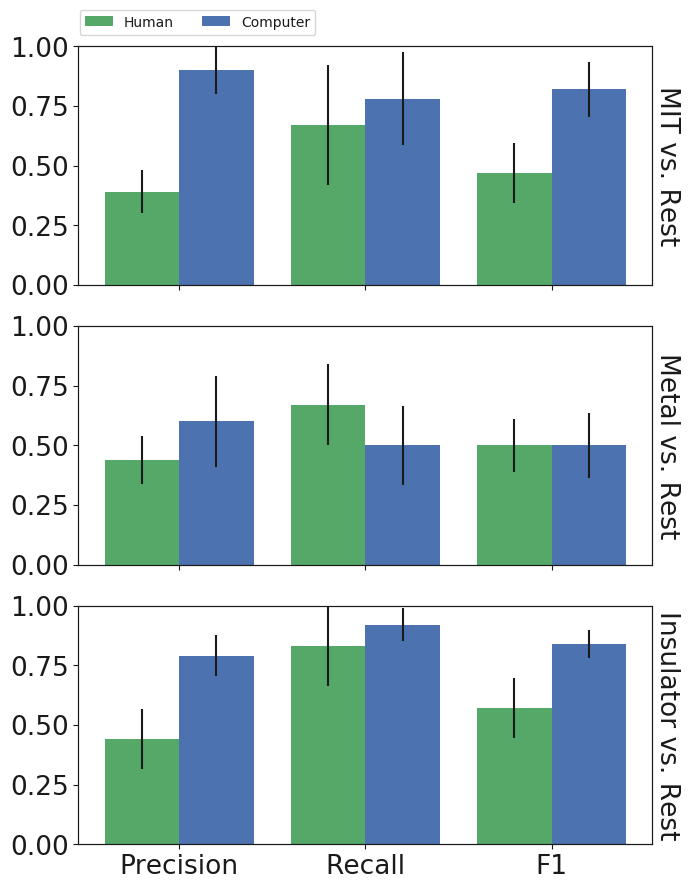

In [90]:
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(7, 9))

# Plot the three subplots in the order of "MIT", "Metal", "Insulator"
for i in range(3):
    axarr[i].bar(human_index, human[i], width=BARWIDTH,
                 yerr=human_err[i], color="g")
    axarr[i].bar(ml_index, ml[i], width=BARWIDTH, yerr=ml_err[i], color="b")
    if i == 0:
        axarr[i].set_ylim(0, 1.0)
        axarr[i].legend(('Human', 'Computer'), frameon=True, bbox_to_anchor=(-0.01, 1.02), loc=3,
                        ncol=2)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    ax = axarr[i].twinx()
    ax.set_ylabel(TITLES[i], rotation=270, labelpad=20, size=TICK_SIZE)
    ax.set_yticks([])

f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0.2, 0.7, 1.2), ('Precision', 'Recall', 'F1'))
plt.tight_layout()

## F1 Score for Best respondent and Median Respondent

In [91]:
best = ir[ir['Respondent'] == 52]
print_report('MIT', df=best)

                       Actual_MIT   Actual_non_MIT
       Predicted_MIT            5                1
   Predicted_non_MIT            1               11

                     precison   recall     f1   support
   Insulator+Metal       0.92     0.92   0.92        12
               MIT       0.83     0.83   0.83         6
           avg/tol       0.89     0.89   0.89        18

MIT_vs_rest_accuracy: 0.8889


In [92]:
best = ir[ir['Respondent'] == 12]
print_report('MIT', best)

                       Actual_MIT   Actual_non_MIT
       Predicted_MIT            6               12
   Predicted_non_MIT            0                0

                     precison   recall     f1   support
   Insulator+Metal          0        0      0        12
               MIT       0.33        1    0.5         6
           avg/tol       0.11     0.33   0.17        18

MIT_vs_rest_accuracy: 0.3333


In [93]:
print_report('Metal', df=best)

                         Actual_Metal   Actual_non_Metal
       Predicted_Metal              5                  5
   Predicted_non_Metal              1                  7

                   precison   recall     f1   support
   MIT+Insulator       0.88     0.58    0.7        12
           Metal        0.5     0.83   0.62         6
         avg/tol       0.75     0.66   0.67        18

Metal_vs_rest_accuracy: 0.6667


In [94]:
print_report('Insulator', best)

                             Actual_Insulator   Actual_non_Insulator
       Predicted_Insulator                  5                      3
   Predicted_non_Insulator                  1                      9

               precison   recall     f1   support
   MIT+Metal        0.9     0.75   0.82        12
   Insulator       0.62     0.83   0.71         6
     avg/tol       0.81     0.78   0.78        18

Insulator_vs_rest_accuracy: 0.7778


In [95]:
median = ir[ir['Accuracy'] == 61]

In [96]:
def give_f1(target_name, ir):
    if target_name == 'MIT':
        target_number = 2

    elif target_name == 'Insulator':
        target_number = 0

    elif target_name == 'Metal':
        target_number = 1

    n_tp, n_tn, n_fp, n_fn = give_stat_metrics(
        target_number, target_name, df=ir)

    if (n_tp + n_fp != 0) & (n_tn + n_fn != 0):
        confusion_metrics = give_confusion_metrics(n_tp, n_tn, n_fp, n_fn)
        a1, a2, a3, a4 = confusion_metrics["avg_total"]

        return a3
    else:
        return 0

In [97]:
def give_f1_list(target_name):
    f1_list = []

    for i in np.arange(1, tn + 1):
        df = ir[ir['Respondent'] == i]
        f1 = give_f1(target_name, df)
        f1_list.append(f1)

    return f1_list

In [98]:
MIT_f1_list = give_f1_list('MIT')
Metal_f1_list = give_f1_list('Metal')
Insulator_f1_list = give_f1_list('Insulator')

In [99]:
def print_f1_report(lst, name, figure_size=(8,6)):
    print(lst)
    f, ax = plt.subplots(figsize=figure_size)
    ax.boxplot(lst, vert=False)
    plt.title("F1 box plot: "+name+" vs. Rest")
    max_num = max(lst)
    lst_bool = [x == max_num for x in lst]
    print("Number of {max_n}: {max_count}".format(max_n=max_num, max_count=sum(lst_bool)))
    print("{binary_name} vs. Rest: Highest f1 score: {max_n}".format(binary_name=name, max_n=max_num))
    print("{binary_name} vs. Rest: Average f1 score ± std: {avg} ± {std}".format(binary_name=name,
                                                                                 avg=round(np.mean(lst),2),
                                                                                 std=round(np.std(lst),2)))
    print("{binary_name} vs. Rest: Median f1 score ± IQR: {med} ± {iqr}".format(binary_name=name,
                                                                                med=round(np.median(lst),2),
                                                                                iqr=round(IQR(lst),2)))

In [100]:
def plot_f1_distribution(f1_list, target_name):
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(
        f1_list, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], kde=False)
    plt.xlabel('f1 score', fontsize=24)
    plt.ylabel('Number of people', fontsize=24)
    plt.title(target_name + " vs. Rest: f1 score distribution", fontsize=32)
    if target_name == 'Metal':
        plt.yticks(np.arange(0, 20, 2))

[0.72, 0.49, 0.6, 0.57, 0.56, 0.34, 0.35, 0.83, 0.53, 0.57, 0.49, 0, 0.27, 0.84, 0.51, 0.49, 0.68, 0.6, 0.61, 0.35, 0.37, 0.53, 0.62, 0.51, 0.51, 0.44, 0.62, 0.61, 0.78, 0.53, 0.68, 0.51, 0.51, 0.51, 0.53, 0.57, 0.51, 0.46, 0.73, 0.57, 0.61, 0.68, 0.46, 0.62, 0.67, 0.56, 0.65, 0.73, 0.44, 0, 0.24, 0.89]
Number of 0.89: 1
MIT vs. Rest: Highest f1 score: 0.89
MIT vs. Rest: Average f1 score ± std: 0.54 ± 0.17
MIT vs. Rest: Median f1 score ± IQR: 0.55 ± 0.13


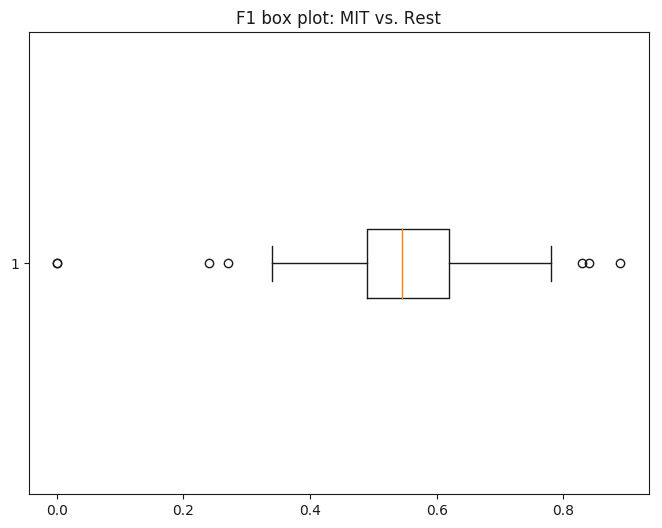

In [101]:
print_f1_report(MIT_f1_list, "MIT")

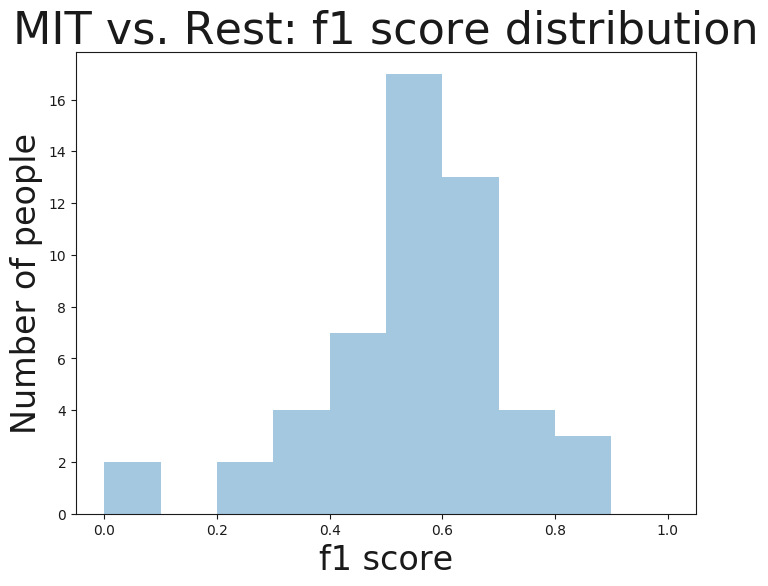

In [102]:
plot_f1_distribution(MIT_f1_list, 'MIT')

[0.62, 0.51, 0.46, 0.69, 0.73, 0.67, 0.65, 0.57, 0.6, 0.57, 0.77, 0.67, 0.72, 0.51, 0.44, 0.51, 0.84, 0.67, 0, 0.57, 0.51, 0.67, 0.67, 0.51, 0.4, 0.67, 0.78, 0.47, 0.78, 0.78, 0.68, 0.4, 0.57, 0.62, 0.3, 0.51, 0.56, 0.6, 0.67, 0.84, 0.57, 0.62, 0.57, 0.62, 0.73, 0.68, 0.67, 0.44, 0.73, 0.69, 0.73, 0.89]
Number of 0.89: 1
Metal vs. Rest: Highest f1 score: 0.89
Metal vs. Rest: Average f1 score ± std: 0.61 ± 0.15
Metal vs. Rest: Median f1 score ± IQR: 0.62 ± 0.18


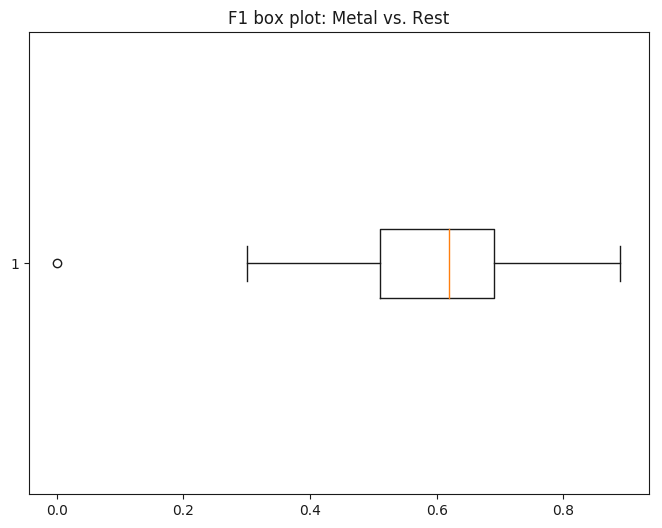

In [103]:
print_f1_report(Metal_f1_list, "Metal")

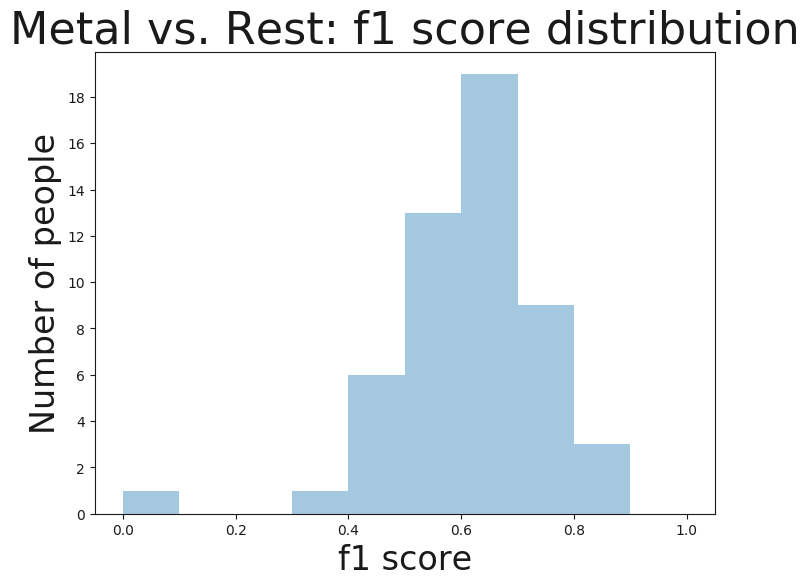

In [104]:
plot_f1_distribution(Metal_f1_list, 'Metal')

[0.73, 0.4, 0.46, 0.46, 0.62, 0.67, 0.42, 0.57, 0.6, 0.68, 0.53, 0.78, 0.49, 0.73, 0.56, 0.41, 0.84, 0.89, 0, 0.34, 0.51, 0.89, 0.44, 0.62, 0.4, 0.44, 0.89, 0.24, 0.89, 0.89, 0.78, 0.62, 0.68, 0.62, 0.62, 0.73, 0.33, 0.37, 0.78, 0.84, 0.46, 0.73, 0.57, 0.73, 0.84, 0.67, 0.68, 0.78, 0.51, 0.46, 0.4, 0.78]
Number of 0.89: 5
Insulator vs. Rest: Highest f1 score: 0.89
Insulator vs. Rest: Average f1 score ± std: 0.6 ± 0.19
Insulator vs. Rest: Median f1 score ± IQR: 0.62 ± 0.28


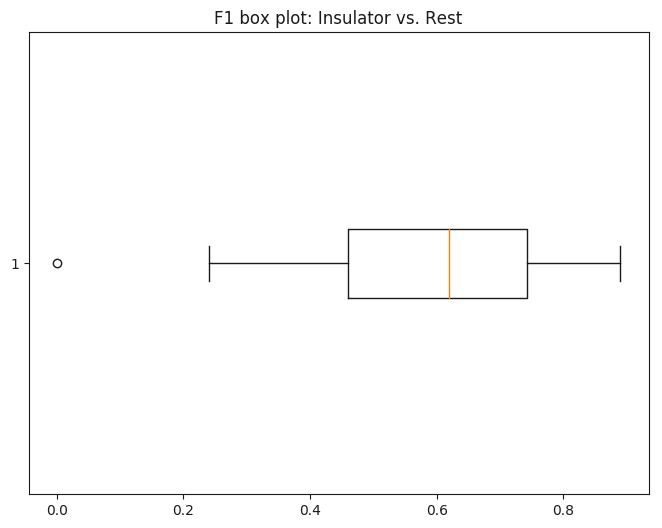

In [105]:
print_f1_report(Insulator_f1_list, "Insulator")

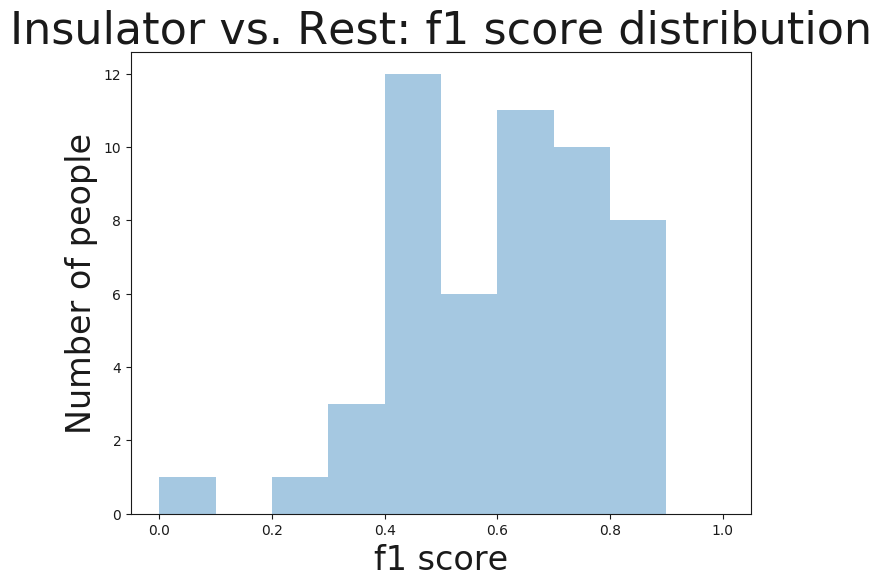

In [106]:
plot_f1_distribution(Insulator_f1_list, 'Insulator')